## Project: Video Games Sales Data Analysis

### Queries:
- Removing Duplicates
- Fixing NULL values(Region,NA_Sales)
- Standardizing categorical values(Country)
- Renaming Columns
- Handling Outliers(Global Sales)
- Create a Bar Chart('National Sales by Region and Country)
- Create Box Plot('Global Sales By Platform)

### Goal:  
- To build up my portfolio and establish my foundation as a future Data Analyst

In [5]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### What is gathered so far:
- 15 columns
- 5909 entries
- Missing Values
- 16 Duplicated Values

In [21]:
df=pd.read_csv("https://raw.githubusercontent.com/saadqureshi45/VideoGamesProject/refs/heads/main/VideoGamesSales.csv")
#df.head()
df.info() 
#df = df[df.duplicated()]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5909 entries, 0 to 5908
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5909 non-null   int64  
 1   Name           5909 non-null   object 
 2   Platform       5909 non-null   object 
 3   Year           5909 non-null   int64  
 4   Month          5909 non-null   object 
 5   Genre          5909 non-null   object 
 6   Publisher      5897 non-null   object 
 7   Country        5909 non-null   object 
 8   City           5909 non-null   object 
 9   State          5909 non-null   object 
 10  Region         5882 non-null   object 
 11  NA_Sales       5909 non-null   object 
 12  Global_Sales   5909 non-null   float64
 13  NA_Profit      5909 non-null   float64
 14  Global_Profit  5909 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 692.6+ KB


### First Step:
- Drop the duplicated rows to start cleaning the data
- Then replace the missing values of the 'Region' column to "North" because there is no information regarding the North region

In [23]:
df = df.drop_duplicates() # 16 duplicates dropped
df['Region'] = df['Region'].fillna('North') # 27 missing values replaced
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5893 entries, 0 to 5908
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Rank           5893 non-null   int64  
 1   Name           5893 non-null   object 
 2   Platform       5893 non-null   object 
 3   Year           5893 non-null   int64  
 4   Month          5893 non-null   object 
 5   Genre          5893 non-null   object 
 6   Publisher      5881 non-null   object 
 7   Country        5893 non-null   object 
 8   City           5893 non-null   object 
 9   State          5893 non-null   object 
 10  Region         5893 non-null   object 
 11  NA_Sales       5893 non-null   object 
 12  Global_Sales   5893 non-null   float64
 13  NA_Profit      5893 non-null   float64
 14  Global_Profit  5893 non-null   float64
dtypes: float64(3), int64(2), object(10)
memory usage: 736.6+ KB


### Second Step:
- Analyze the 'NA_Sales' column and replace the "$" to keep data clean
- Replace all NAN values with the mean for 'NA_Sales' column, should there be any

In [25]:
df['NA_Sales'] = df['NA_Sales'].replace('[$]', '', regex=True)
df['NA_Sales'] = pd.to_numeric(df['NA_Sales'], errors='coerce')
Average_Sales=df['NA_Sales'].mean()
Average_Sales=int(Average_Sales)
df['NA_Sales']=df['NA_Sales'].fillna(Average_Sales)
df.head()

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,NA_Sales,Global_Sales,NA_Profit,Global_Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411


### Third Step:
- In the 'Country' column, replace "USA" with "United States" and convert to titles.
- Replace the columns with more appropriate titles

In [27]:
df['Country'] = df['Country'].replace({'USA': 'United States'})
df['Country'] = df['Country'].str.title()
df = df.rename(columns={'NA_Sales': 'National Sales', 'Global_Sales': 'Global Sales', 'NA_Profit': 'National Profit', 'Global_Profit': 'Global Profit'})
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
0,1,Wii Sports,Wii,2010,Jan,Sports,Nintendo,United States,Fairfield,California,West,41.49,82.74,12.447,24.822
1,2,Super Mario Bros.,NES,2010,Feb,Platform,Nintendo,United States,Edmonds,Washington,West,29.08,40.24,8.724,12.072
2,3,Mario Kart Wii,Wii,2010,Mar,Racing,Nintendo,United States,Louisville,Kentucky,South,15.85,35.82,4.755,10.746
3,4,Wii Sports Resort,Wii,2010,Apr,Sports,Nintendo,United States,Round Rock,Texas,Central,15.75,33.00,4.725,9.900
4,5,Pokemon Red/Pokemon Blue,GB,2010,May,Role-Playing,Nintendo,United States,Nashville,Tennessee,South,11.27,31.37,3.381,9.411
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


### Fourth Step:
- Handle outliers in the data

In [31]:
Q1 = df['Global Sales'].quantile(0.25)
Q3 = df['Global Sales'].quantile(0.75)
IQR = Q3 - Q1

# Defining bounds:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df = df[(df['Global Sales'] >= lower_bound) & (df['Global Sales'] <= upper_bound)]
df

,Rank,Name,Platform,Year,Month,Genre,Publisher,Country,City,State,Region,National Sales,Global Sales,National Profit,Global Profit
831,823,Need for Speed: ProStreet,PS3,2011,Jun,Racing,Electronic Arts,United States,Denver,Colorado,West,0.73,2.05,0.219,0.615
832,824,Carnival Games,DS,2011,Jul,Misc,Take-Two Interactive,United States,Denver,Colorado,West,1.23,2.05,0.369,0.615
833,825,NBA 2K14,PS3,2011,Aug,Sports,Take-Two Interactive,United States,Los Angeles,California,West,1.43,2.05,0.429,0.615
834,826,Pokémon Mystery Dungeon: Blue Rescue Team,DS,2011,Sep,Role-Playing,Nintendo,United States,Seattle,Washington,West,1.16,2.05,0.348,0.615
835,827,Sonic Mega Collection,GC,2011,Oct,Misc,Infogrames,United States,Philadelphia,Pennsylvania,East,1.47,2.05,0.441,0.615
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5904,5890,Crazy Taxi: Catch a Ride,GBA,2017,Sep,Racing,THQ,Australia,Sydney,New South Wales,West,0.21,0.30,0.063,0.090
5905,5891,MySims Party,DS,2017,Oct,Simulation,Electronic Arts,Australia,Sydney,New South Wales,West,0.15,0.30,0.045,0.090
5906,5892,Harry Potter and the Order of the Phoenix,X360,2017,Nov,Action,Electronic Arts,Australia,Sydney,New South Wales,West,0.24,0.30,0.072,0.090
5907,5893,Skylanders: SuperChargers,PS4,2017,Dec,Action,Activision,Australia,Sydney,New South Wales,West,0.17,0.30,0.051,0.090


### Fifth Step:
- Visualization using matplotlib

<Figure size 1200x600 with 0 Axes>

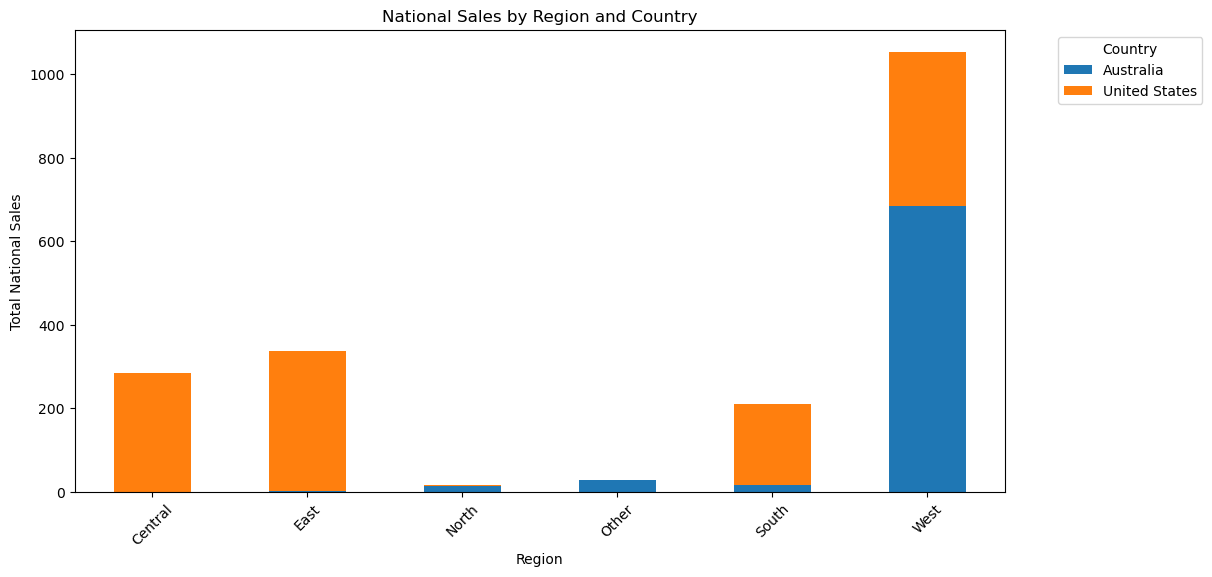

In [36]:
plt.figure(figsize=(12, 6))

# Aggregate data
sales_by_region = df.groupby(['Region', 'Country'])['National Sales'].sum().unstack()

# Plot
sales_by_region.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title('National Sales by Region and Country')
plt.xlabel('Region')
plt.ylabel('Total National Sales')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.show()

### Sixth Step:
- Box plot

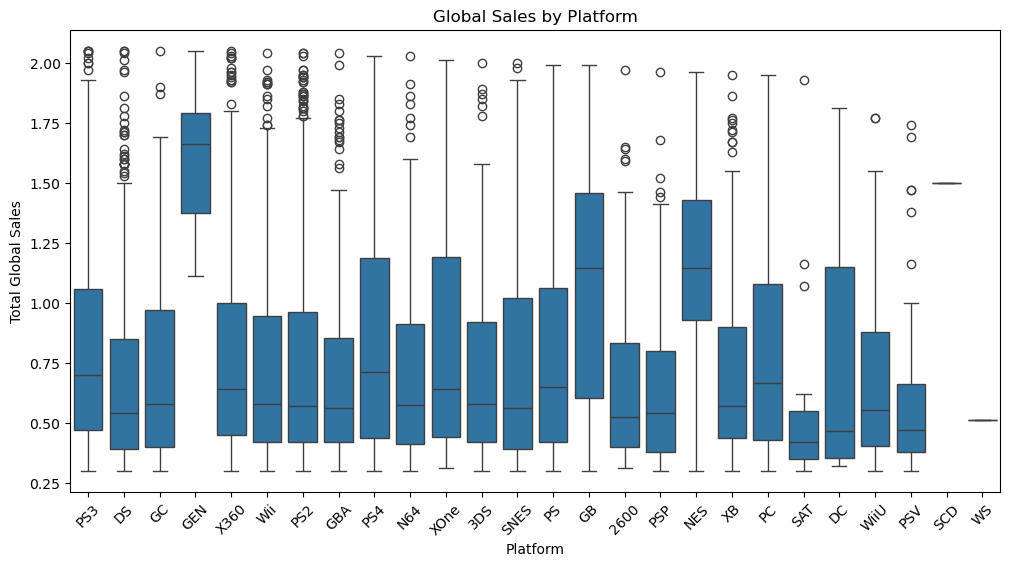

In [38]:
plt.figure(figsize=(12, 6))

# Boxplot
sns.boxplot(x='Platform', y='Global Sales', data=df)
plt.xticks(rotation=45)
plt.title('Global Sales by Platform')
plt.ylabel('Total Global Sales')
plt.xlabel('Platform')

plt.show()


### Seventh Step:
- Pie chart

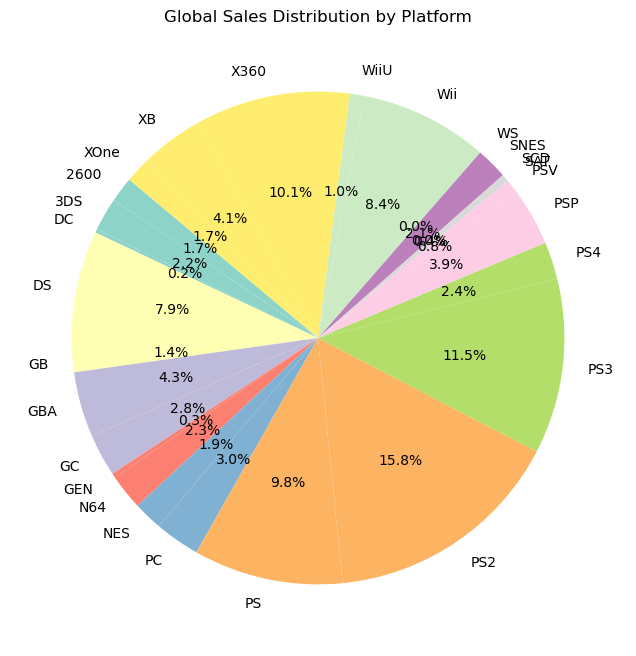

In [58]:
plt.figure(figsize=(8, 8))

platform_sales = df.groupby('Platform')['Global Sales'].sum()

platform_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='Set3')

plt.title('Global Sales Distribution by Platform')
plt.ylabel('') 

plt.show()


### Final Step:
- Create a Line Chart

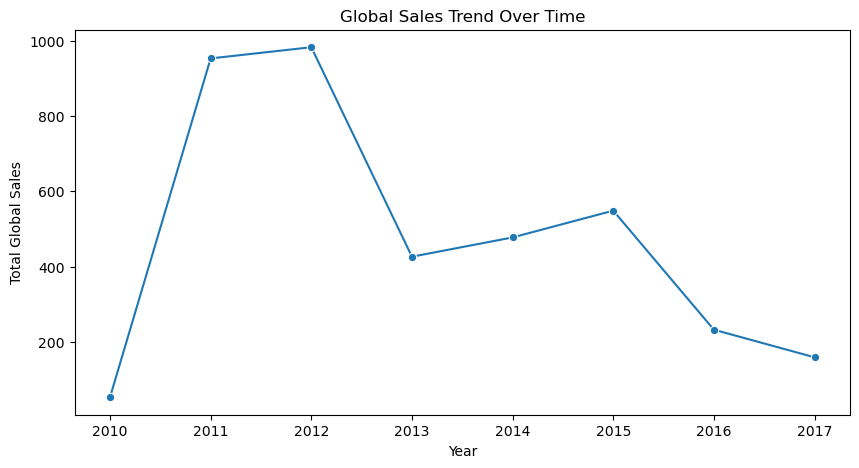

In [50]:
plt.figure(figsize=(10, 5))

df['Year'] = pd.to_numeric(df['Year'], errors='coerce')

# Group by Year and sum Global Sales
yearly_sales = df.groupby('Year')['Global Sales'].sum()

sns.lineplot(x=yearly_sales.index, y=yearly_sales.values, marker='o', linestyle='-')

plt.xlabel('Year')
plt.ylabel('Total Global Sales')
plt.title('Global Sales Trend Over Time')

plt.show()